In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from Logreg import LogisticRegression
from irls_optimizer import IRLS
from sklearn.preprocessing import LabelEncoder
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
np.seterr(over ='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## NBA PLAYERS DATA ##

In [3]:
# data:
url = 'data/big/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe.drop('name', axis=1, inplace=True)
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]


Epoch::   1%|          | 6/500 [00:00<00:01, 250.20it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6557587711433865


Epoch::   2%|▏         | 8/500 [00:00<00:01, 334.83it/s]


Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6466010075281599


Epoch::  18%|█▊        | 88/500 [00:00<00:02, 165.64it/s]


Early stopping after epoch 88
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6409945986217173


Epoch::   1%|▏         | 7/500 [00:00<00:04, 117.42it/s]


Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6711895345299665


Epoch::   2%|▏         | 11/500 [00:00<00:02, 206.96it/s]


Early stopping after epoch 11
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6057930875310138


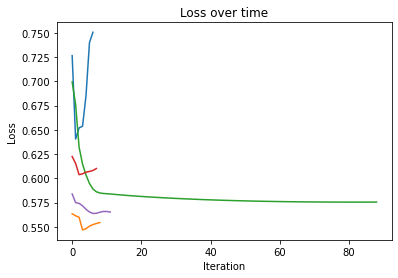

In [3]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   1%|▏         | 7/500 [00:03<04:20,  1.89it/s]


Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.7100890562429024


Epoch::   2%|▏         | 12/500 [00:05<03:25,  2.37it/s]


Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6536480443765212


Epoch::   1%|          | 6/500 [00:04<05:29,  1.50it/s]


Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.631588750232818


Epoch::   1%|          | 5/500 [00:02<04:02,  2.04it/s]


Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.7227867356251901


Epoch::   1%|          | 5/500 [00:02<04:25,  1.86it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6410478333621834


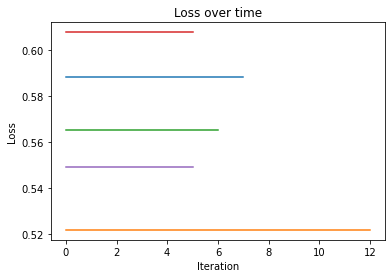

In [4]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::  18%|█▊        | 91/500 [00:00<00:01, 206.68it/s]


Early stopping after epoch 91
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6020859482397944


Epoch:: 100%|██████████| 500/500 [00:01<00:00, 272.99it/s]


accuracy : 0.6156110262070527


Epoch:: 100%|██████████| 500/500 [00:02<00:00, 221.00it/s]


accuracy : 0.6460234680573664


Epoch::  26%|██▌       | 131/500 [00:00<00:01, 188.30it/s]


Early stopping after epoch 131
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6353818071189534


Epoch::  69%|██████▉   | 346/500 [00:01<00:00, 276.15it/s]


Early stopping after epoch 346
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.5908487681033986


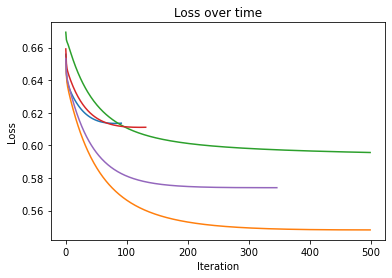

In [5]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.00001)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [6]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.6785607554838324
qda: 0.7042316657701273
dt: 0.6071962225808379
rf: 0.6296395911780527
lda: 0.6446765155374428
qda: 0.6522895794418974
dt: 0.5657440425652347
rf: 0.6570725080658855
lda: 0.664555783199851
qda: 0.6733718259141988
dt: 0.6246973365617433
rf: 0.66157571242317
lda: 0.7238211134773349
qda: 0.6611499847885609
dt: 0.5907818679647094
rf: 0.7104046242774567
lda: 0.63017136922278
qda: 0.6717442732675553
dt: 0.5448618083203508
rf: 0.6164099013328718


## SMOKING DATA ##

In [4]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop('oral', axis=1, inplace=True)
data = dataframe.values

X, y = data[:,:-1], data[:,-1]
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,-1] = LabelEncoder().fit_transform(X[:,-1])

Epoch::   6%|▋         | 32/500 [00:12<02:59,  2.61it/s]


Early stopping after epoch 32
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6393409247757074


Epoch::   2%|▏         | 9/500 [00:03<03:17,  2.49it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6525645472804279


Epoch::   2%|▏         | 9/500 [00:03<03:37,  2.26it/s]


Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.664044649211522


Epoch::   9%|▉         | 46/500 [00:17<02:55,  2.59it/s]


Early stopping after epoch 46
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.7236782088877891


Epoch::   2%|▏         | 8/500 [00:03<03:38,  2.25it/s]

Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss
accuracy : 0.6457986852215487


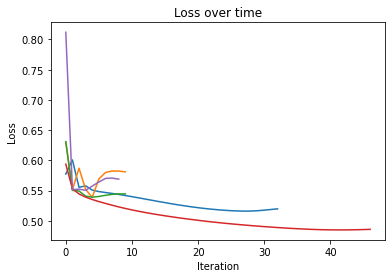

In [8]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.001)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [6]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   0%|          | 0/500 [00:02<?, ?it/s]


MemoryError: Unable to allocate 14.8 GiB for an array with shape (44553, 44553) and data type float64

Early stopping after epoch 4
accuracy : 0.5223033126293997
Early stopping after epoch 4
accuracy : 0.5253761064789239
Early stopping after epoch 4
accuracy : 0.5150347874641432
Early stopping after epoch 4
accuracy : 0.5025910287461921
Early stopping after epoch 4
accuracy : 0.5010501152565525


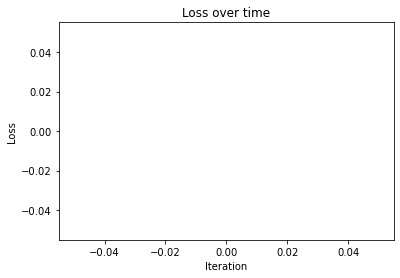

In [15]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=8, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [10]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    comparison_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.7391451033229804
qda: 0.7272146062242413
dt: 0.7479017494500091
rf: 0.8234056666642672
lda: 0.745349763402287
qda: 0.7415276882144005
dt: 0.7526719715180362
rf: 0.8235751729624032
lda: 0.741751362518593
qda: 0.7396250760577121
dt: 0.754763404677525
rf: 0.8226833576986219
lda: 0.7503095990672303
qda: 0.7445017145490753
dt: 0.7518372502553767
rf: 0.8242277134415832
lda: 0.7433894504832903
qda: 0.7314483484049776
dt: 0.7526066188364702
rf: 0.8177315027066678


## BANANA DATA ##

In [7]:
from sklearn.impute import SimpleImputer
url = 'data/small/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)


Early stopping after epoch 104
accuracy : 0.8792029566677454
Early stopping after epoch 71
accuracy : 0.8811576807000598
Early stopping after epoch 76
accuracy : 0.8818268766438655
Early stopping after epoch 96
accuracy : 0.8789640856342538
accuracy : 0.8786008133638854


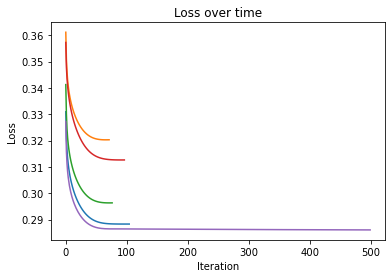

In [17]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [8]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   0%|          | 0/500 [00:47<?, ?it/s]


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

Early stopping after epoch 28
accuracy : 0.8812807758014269
Early stopping after epoch 55
accuracy : 0.8891604010025063
accuracy : 0.8687499999999999
accuracy : 0.8700676913076361
accuracy : 0.8644426075379072


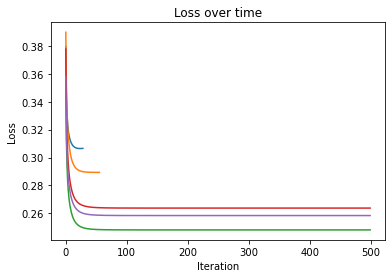

In [19]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta = 0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [18]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.880126915338183
qda: 0.9255087635369326
dt: 0.9386263189080091
rf: 0.9717848661510633
lda: 0.8822861036742515
qda: 0.924446455392127
dt: 0.9319890721143552
rf: 0.9719183659435069
lda: 0.8826840699569762
qda: 0.9207389209522425
dt: 0.9318707130566872
rf: 0.9699599455522059
lda: 0.8763880552220888
qda: 0.9172669067627051
dt: 0.9272709083633454
rf: 0.9694252701080432
lda: 0.8867438625217418
qda: 0.9270991642082249
dt: 0.9293011751900488
rf: 0.9692722228234361


### with interactions ###

In [6]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X)
print(len(X[0]),len(X_int[0]))

7 28


Early stopping after epoch 140
accuracy : 0.9593669241556566
Early stopping after epoch 52
accuracy : 0.9593541106948553
Early stopping after epoch 18
accuracy : 0.9573544373233065
Early stopping after epoch 9
accuracy : 0.9511304521808723
Early stopping after epoch 23
accuracy : 0.9456633401244356


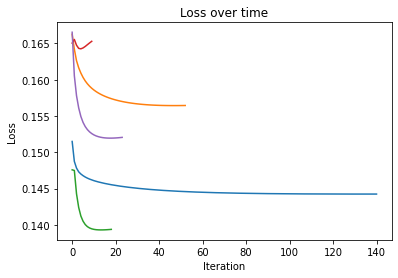

In [21]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [22]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")

Early stopping after epoch 36
accuracy : 0.9665234649783941
Early stopping after epoch 72
accuracy : 0.9652882205513784
Early stopping after epoch 365
accuracy : 0.9475
accuracy : 0.9412373195992274
Early stopping after epoch 31
accuracy : 0.9442260488771383


In [7]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Epoch::   0%|          | 0/500 [05:23<?, ?it/s]


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [23]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.880126915338183
qda: 0.9255087635369326
dt: 0.9380455225525648
rf: 0.9755963910893488
lda: 0.8822861036742515
qda: 0.924446455392127
dt: 0.9357197447450967
rf: 0.9756490385742485
lda: 0.8826840699569762
qda: 0.9207389209522425
dt: 0.931322953245848
rf: 0.9686753276791393
lda: 0.8763880552220888
qda: 0.9172669067627051
dt: 0.9247949179671868
rf: 0.9681997799119648
lda: 0.8867438625217418
qda: 0.9270991642082249
dt: 0.9391082796553947
rf: 0.9707574823674441
